# Motion History Image (MHI)
One of the key techniques pre-deep learning for representing and analysing motion in video sequences was the concept of Motion History Images (MHI).

## What is a Motion History Image?
A Motion History Image is a visual method for representing temporal motion in a video sequence. MHI was proposed by Bobick and Davis:
* Bobick, A. F., & Davis, J. W. (2001). [The recognition of human movement using temporal templates](https://www.cs.bu.edu/fac/betke/cs591/papers/bobick-davis.pdf). *IEEE Transactions on Pattern Analysis and Machine Intelligence, 23*(3), 257-267.

It is essentially a single image that encapsulates information about the movement of objects over time. The core idea behind MHI is to provide a compact representation of motion by blending a sequence of frames into a single image, where the intensity of each pixel is a function of the recency of motion at that location.

## How MHI Works
The MHI is generated by processing a series of video frames and updating each pixel's intensity level based on the motion detected at that pixel. When motion occurs at a particular pixel location, the value of that pixel in the MHI is reset to a maximum value, which then gradually decays over time in the absence of new motion. As a result, the resulting MHI encodes the temporal history of motion in a way that regions with recent movement appear brighter, while older movements fade into darker regions.

## Applications of MHI
MHI finds its utility in various domains:
1. Action Recognition: MHIs provide a means to capture the essence of an action performed by a person or an object, making them suitable for action recognition tasks.
2. Gesture Analysis: In human-computer interaction, MHIs can be employed to understand and interpret gestures by analyzing the motion trajectory over time.
3. Surveillance: In security and surveillance, MHIs help in detecting and summarizing movements in a monitored area, aiding in anomaly detection or activity analysis.
4. Sports Analysis: Coaches and athletes can use MHIs for technique assessment, where the motion patterns in sports activities are analyzed for performance improvement.

## Advantages and Challenges
MHIs offer a simple yet effective way of summarizing motion, providing an intuitive representation that is less complex compared to processing the full video data. However, the effectiveness of MHIs can be influenced by factors like the duration of history captured, the rate of decay of the pixel intensities, and the complexity of the background in the video.

## Imports

In [1]:
!pip install opencv-python numpy matplotlib

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Obtain image samples

These images have been obtained from the [NTU RGB+D dataset](https://rose1.ntu.edu.sg/dataset/actionRecognition).

In [3]:
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C001P001R001A055_rgb.avi' -O example1.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C001P001R002A015_rgb.avi' -O example2.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C002P006R001A050_rgb.avi' -O example3.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C002P006R001A051_rgb.avi' -O example4.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C002P006R001A052_rgb.avi' -O example5.avi
!wget 'https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C002P007R002A048_rgb.avi' -O example6.avi

--2024-03-17 16:40:14--  https://github.com/FranciscoFlorezRevuelta/HAR/raw/main/samples/S001C001P001R001A055_rgb.avi
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FranciscoFlorezRevuelta/HAR/main/samples/S001C001P001R001A055_rgb.avi [following]
--2024-03-17 16:40:14--  https://raw.githubusercontent.com/FranciscoFlorezRevuelta/HAR/main/samples/S001C001P001R001A055_rgb.avi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2128786 (2.0M) [video/msvideo]
Saving to: ‘example1.avi’

example1.avi        100%[===================>]   2.03M  --.-KB/s    in 0.02s   

2024-03-17 16:40:14 (127 MB/s) - ‘exam

## Read the video

You can change the name of the video to example{1-6}.avi

In [4]:
# Load your video
video_path = '/content/example1.avi'
cap = cv2.VideoCapture(video_path)

## Initialise MHI parameters

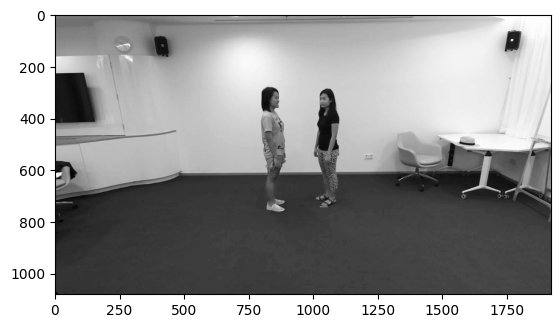

In [5]:
# Initialize MHI parameters
duration = 100
timestamp = 0
ret, prev_frame = cap.read()
prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
h, w = prev_frame.shape
mhi = np.zeros((h, w), dtype=np.float32)
plt.imshow(prev_frame,cmap='gray')
plt.show()

## Calculate motion

In [6]:
def calculate_motion(prev_frame, curr_frame, mhi, timestamp, duration):
    """ Calculate the difference between frames and update the MHI. """
    # Calculate the absolute difference between the current frame and the previous frame
    motion = cv2.absdiff(prev_frame, curr_frame)
    _, thresh = cv2.threshold(motion, 25, 1, cv2.THRESH_BINARY)

    # Update MHI: decrease the intensity for older movements and increase for new movements
    mhi[mhi > 0] -= 1  # Decaying the MHI
    mhi[thresh == 1] = duration  # Updating new motion

    return mhi

## Process all frames

In [7]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    mhi = calculate_motion(prev_frame, frame, mhi, timestamp, duration)
    prev_frame = frame.copy()

## Normalise the MHI for visualisation

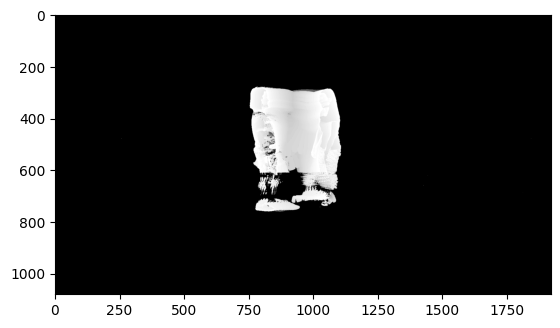

In [8]:
# Normalize the MHI for visualization
mhi = np.uint8(np.clip((mhi / duration) * 255, 0, 255))
plt.imshow(mhi, cmap='gray')
plt.show()

cap.release()